In [1]:
from Superior import Superior
from Reality import Reality
from Individual import Individual
import matplotlib.pyplot as plt
import numpy as np

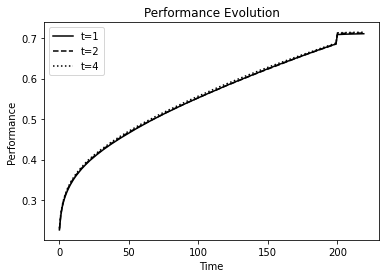

In [9]:
# Bottom-up Consensus Structure (smooth payoff function)
m = 24
s = 3
t_list = [1, 2, 4]
n = 100
alpha = 0.5
results_across_t = []
for t in t_list:
    payoff_list_final = []
    for _ in range(100):
        reality = Reality(m=m, s=s, t=t, alpha=alpha)
        superior = Superior(m=m, s=s, t=t, n=n, reality=reality, alpha=alpha)
        superior.policy = []  # remove the policy
        payoff_list = []
        for _ in range(200):
            for individual in superior.individuals:
                individual.free_local_search()
            performance = [individual.payoff for individual in superior.individuals]
            payoff_list.append(sum(performance) / len(performance))
        payoff_list_final.append(payoff_list)

        for index in range(int(m/s)):
            for individual in superior.individuals:
                individual.individual_policy = []  # reset the policy dummy
                for i in range(m // s):
                    temp = sum(individual.belief[index] for index in range(i * s, (i + 1) *s))
                    if temp < 0:
                        individual.individual_policy.append(-1)
                    else:
                        individual.individual_policy.append(1)
            temp = sum([individual.individual_policy[index] for individual in superior.individuals])
            if temp > 0:
                superior.policy.append(1)
            elif temp == 0:
                superior.policy.append(0)
            else:
                superior.policy.append(-1)
        for _ in range(20):
            for index, value in enumerate(superior.policy):
                for individual in superior.individuals:
                    individual.constrained_local_search(focal_policy=value, focal_policy_index=index)
            performance = [individual.payoff for individual in superior.individuals]
            payoff_list.append(sum(performance) / len(performance))
        payoff_list_final.append(payoff_list)
    result = []
    for index in range(220):
        temp = [payoff_list[index] for payoff_list in payoff_list_final]
        result.append(sum(temp) / len(temp))
    results_across_t.append(result)

x = range(220)
plt.plot(x, results_across_t[0], "k-", label="t=1")
plt.plot(x, results_across_t[1], "k--", label="t=2")
plt.plot(x, results_across_t[2], "k:", label="t=4")
# plt.savefig("search.jpg")
plt.title('DAO Performance Evolution')
plt.xlabel('Time')
plt.ylabel('Performance')
plt.legend()
plt.show()

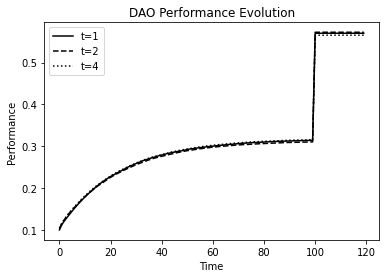

In [3]:
# Bottom-up Consensus Structure (rushed payoff function)
# In this version, individual payoff is not associated with the policy dependency
m = 24
s = 3
t_list = [1, 2, 4]
n = 100
alpha = 0.5
results_across_t = []
for t in t_list:
    payoff_list_final = []
    for _ in range(100):
        reality = Reality(m=m, s=s, t=t, alpha=alpha)
        superior = Superior(m=m, s=s, t=t, n=n, reality=reality, alpha=alpha)
        superior.policy = []  # remove the policy
        payoff_list = []
        for _ in range(100):
            for individual in superior.individuals:
                individual.free_local_search()
            performance = [individual.payoff for individual in superior.individuals]
            payoff_list.append(sum(performance) / len(performance))
        payoff_list_final.append(payoff_list)

        for index in range(int(m/s)):
            for individual in superior.individuals:
                individual.individual_policy = []  # reset the policy dummy
                for i in range(m // s):
                    temp = sum(individual.belief[index] for index in range(i * s, (i + 1) *s))
                    if temp < 0:
                        individual.individual_policy.append(-1)
                    else:
                        individual.individual_policy.append(1)
            temp = sum([individual.individual_policy[index] for individual in superior.individuals])
            if temp > 0:
                superior.policy.append(1)
            elif temp == 0:
                superior.policy.append(0)
            else:
                superior.policy.append(-1)
        for _ in range(20):
            for index, value in enumerate(superior.policy):
                for individual in superior.individuals:
                    individual.constrained_local_search(focal_policy=value, focal_policy_index=index)
            performance = [individual.payoff for individual in superior.individuals]
            payoff_list.append(sum(performance) / len(performance))
        payoff_list_final.append(payoff_list)
    result = []
    for index in range(120):
        temp = [payoff_list[index] for payoff_list in payoff_list_final]
        result.append(sum(temp) / len(temp))
    results_across_t.append(result)

x = range(120)
plt.plot(x, results_across_t[0], "k-", label="t=1")
plt.plot(x, results_across_t[1], "k--", label="t=2")
plt.plot(x, results_across_t[2], "k:", label="t=4")
# plt.savefig("search.jpg")
plt.title('DAO Performance Evolution')
plt.xlabel('Time')
plt.ylabel('Performance')
plt.legend()
plt.show()

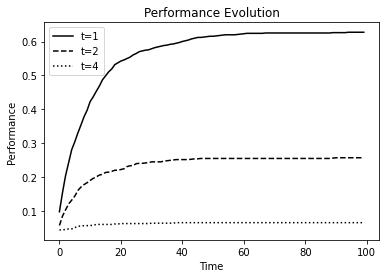

In [8]:
# Top-down hierarchy
m = 24
s = 3
t_list = [1, 2, 4]
n = 100
alpha = 0.5

results_across_t = []
for t in t_list:
    payoff_list_final = []
    for _ in range(100):
        reality = Reality(m=m, s=s, t=t, alpha=alpha)
        superior = Superior(m=m, s=s, t=t, n=n, reality=reality, alpha=alpha)
        payoff_list = []
        for _ in range(100):
            superior.local_search()
            performance = [individual.payoff for individual in superior.individuals]
            payoff_list.append(sum(performance) / len(performance))
        payoff_list_final.append(payoff_list)
    result = []
    for index in range(100):
        temp = [payoff_list[index] for payoff_list in payoff_list_final]
        temp = sum(temp) / len(temp)
        result.append(temp)
    results_across_t.append(result)

x = range(100)
plt.plot(x, results_across_t[0], "k-", label="t=1")
plt.plot(x, results_across_t[1], "k--", label="t=2")
plt.plot(x, results_across_t[2], "k:", label="t=4")
# plt.savefig("search.jpg")
plt.title('Hierarchy Performance Evolution')
plt.xlabel('Time')
plt.ylabel('Performance')
plt.legend()
plt.show()

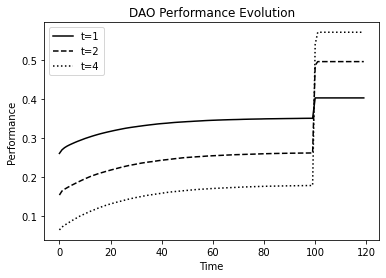

In [2]:
# Bottom-up Consensus Structure (rushed payoff function)
# In this version, individual payoff is not associated with the policy dependency
m = 24
s = 3
t_list = [1, 2, 4]
n = 100
alpha = 0.5
results_across_t = []
for t in t_list:
    payoff_list_final = []
    for _ in range(100):
        reality = Reality(m=m, s=s, t=t, alpha=alpha)
        superior = Superior(m=m, s=s, t=t, n=n, reality=reality)
        superior.policy = []  # remove the policy
        payoff_list = []
        for _ in range(100):
            for individual in superior.individuals:
                individual.free_local_search()
            performance = [individual.payoff for individual in superior.individuals]
            payoff_list.append(sum(performance) / len(performance))
        payoff_list_final.append(payoff_list)

        for index in range(int(m/s)):
            for individual in superior.individuals:
                individual.individual_policy = []  # reset the policy dummy
                for i in range(m // s):
                    temp = sum(individual.belief[index] for index in range(i * s, (i + 1) *s))
                    if temp < 0:
                        individual.individual_policy.append(-1)
                    else:
                        individual.individual_policy.append(1)
            temp = sum([individual.individual_policy[index] for individual in superior.individuals])
            if temp > 0:
                superior.policy.append(1)
            elif temp == 0:
                superior.policy.append(0)
            else:
                superior.policy.append(-1)
        for _ in range(20):
            for index, value in enumerate(superior.policy):
                for individual in superior.individuals:
                    individual.constrained_local_search(focal_policy=value, focal_policy_index=index)
            performance = [individual.payoff for individual in superior.individuals]
            payoff_list.append(sum(performance) / len(performance))
        payoff_list_final.append(payoff_list)
    result = []
    for index in range(120):
        temp = [payoff_list[index] for payoff_list in payoff_list_final]
        result.append(sum(temp) / len(temp))
    results_across_t.append(result)

x = range(120)
plt.plot(x, results_across_t[0], "k-", label="t=1")
plt.plot(x, results_across_t[1], "k--", label="t=2")
plt.plot(x, results_across_t[2], "k:", label="t=4")
# plt.savefig("search.jpg")
plt.title('DAO Performance Evolution')
plt.xlabel('Time')
plt.ylabel('Performance')
plt.legend()
plt.show()

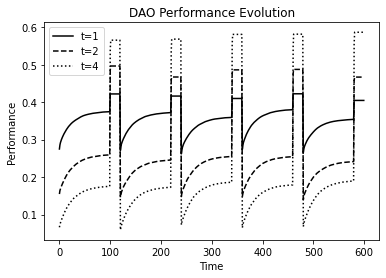

In [5]:
# Bottom-up Consensus Structure (rushed payoff function)
# In this version, individual payoff is not associated with the policy dependency
m = 24
s = 3
t_list = [1, 2, 4]
n = 100
alpha = 0.5
result_t_level = []
for t in t_list:
    result_repeat_level = []
    for _ in range(100):  # repeat
        payoff_list = []  # one round-> 5 * (100 + 20) = 600 points
        for _ in range(5):  # consensus evolution
            reality = Reality(m=m, s=s, t=t, alpha=alpha)
            superior = Superior(m=m, s=s, t=t, n=n, reality=reality)
            superior.policy = []  # remove the policy
            for _ in range(100):  # independent search
                for individual in superior.individuals:
                    individual.free_local_search()
                performance = [individual.payoff for individual in superior.individuals]
                payoff_list.append(sum(performance) / len(performance))
            # form consensus
            for index in range(int(m/s)):
                for individual in superior.individuals:
                    individual.individual_policy = []  # reset the policy dummy
                    for i in range(m // s):
                        temp = sum(individual.belief[index] for index in range(i * s, (i + 1) *s))
                        if temp < 0:
                            individual.individual_policy.append(-1)
                        else:
                            individual.individual_policy.append(1)
                temp = sum([individual.individual_policy[index] for individual in superior.individuals])
                if temp > 0:
                    superior.policy.append(1)
                elif temp == 0:
                    superior.policy.append(0)
                else:
                    superior.policy.append(-1)
            # learn from the consensus
            for _ in range(20):
                for index, value in enumerate(superior.policy):
                    for individual in superior.individuals:
                        individual.constrained_local_search(focal_policy=value, focal_policy_index=index)
                performance = [individual.payoff for individual in superior.individuals]
                payoff_list.append(sum(performance) / len(performance))
        result_repeat_level.append(payoff_list)
    result_t_level.append(result_repeat_level)
results_across_t = []
for ti, t in enumerate(t_list):
    temp_within_t = []
    for index in range(600):
        temp = [result_repeat_level[index] for result_repeat_level in result_t_level[ti]]  # 100 repeat to take the average
        temp_within_t.append(sum(temp) / len(temp))
    results_across_t.append(temp_within_t)

x = range(600)
plt.plot(x, results_across_t[0], "k-", label="t=1")
plt.plot(x, results_across_t[1], "k--", label="t=2")
plt.plot(x, results_across_t[2], "k:", label="t=4")
# plt.savefig("search.jpg")
plt.title('DAO Performance Evolution')
plt.xlabel('Time')
plt.ylabel('Performance')
plt.legend()
plt.show()

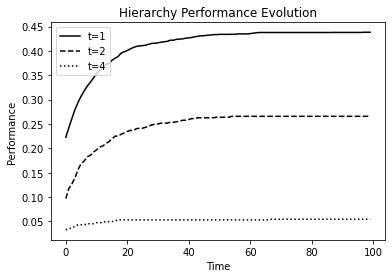

In [5]:
# Top-down hierarchy
# In this version, superior consider the policy interdependency, while managers get engaged in the whole payoff feedback
m = 24
s = 1
t_list = [1, 2, 4]
n = 100
alpha = 0.5

results_across_t = []
for t in t_list:
    payoff_list_final = []
    for _ in range(100):
        reality = Reality(m=m, s=s, t=t, alpha=alpha)
        superior = Superior(m=m, s=s, t=t, n=n, reality=reality)
        payoff_list = []
        for _ in range(100):
            superior.local_search()
            performance = [individual.payoff for individual in superior.individuals]
            payoff_list.append(sum(performance) / len(performance))
        payoff_list_final.append(payoff_list)
    result = []
    for index in range(100):
        temp = [payoff_list[index] for payoff_list in payoff_list_final]
        temp = sum(temp) / len(temp)
        result.append(temp)
    results_across_t.append(result)

x = range(100)
plt.plot(x, results_across_t[0], "k-", label="t=1")
plt.plot(x, results_across_t[1], "k--", label="t=2")
plt.plot(x, results_across_t[2], "k:", label="t=4")
# plt.savefig("search.jpg")
plt.title('Hierarchy Performance Evolution')
plt.xlabel('Time')
plt.ylabel('Performance')
plt.legend()
plt.show()

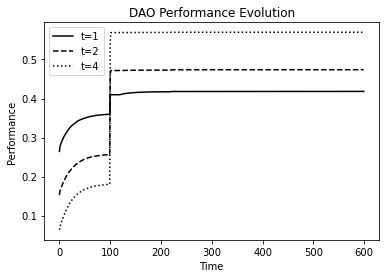

In [3]:
# Bottom-up Consensus Structure (rushed payoff function)
# In this version, individual payoff is not associated with the policy dependency
m = 24
s = 3
t_list = [1, 2, 4]
n = 100
alpha = 0.5
result_t_level = []
for t in t_list:
    result_repeat_level = []
    for _ in range(100):  # repeat
        payoff_list = []  # one round-> 5 * (100 + 20) = 600 points
        reality = Reality(m=m, s=s, t=t, alpha=alpha)
        superior = Superior(m=m, s=s, t=t, n=n, reality=reality)
        for _ in range(5):  # consensus evolution
            superior.policy = []  # remove the policy, for policy evolution
            for _ in range(100):  # independent search
                for individual in superior.individuals:
                    individual.free_local_search()
                performance = [individual.payoff for individual in superior.individuals]
                payoff_list.append(sum(performance) / len(performance))
            # form consensus
            for index in range(int(m/s)):
                for individual in superior.individuals:
                    individual.individual_policy = []  # reset the policy dummy
                    for i in range(m // s):
                        temp = sum(individual.belief[index] for index in range(i * s, (i + 1) *s))
                        if temp < 0:
                            individual.individual_policy.append(-1)
                        else:
                            individual.individual_policy.append(1)
                temp = sum([individual.individual_policy[index] for individual in superior.individuals])
                if temp > 0:
                    superior.policy.append(1)
                elif temp == 0:
                    superior.policy.append(0)
                else:
                    superior.policy.append(-1)
            # learn from the consensus
            for _ in range(20):
                for index, value in enumerate(superior.policy):
                    for individual in superior.individuals:
                        individual.constrained_local_search(focal_policy=value, focal_policy_index=index)
                performance = [individual.payoff for individual in superior.individuals]
                payoff_list.append(sum(performance) / len(performance))
        result_repeat_level.append(payoff_list)
    result_t_level.append(result_repeat_level)
results_across_t = []
for ti, t in enumerate(t_list):
    temp_within_t = []
    for index in range(600):
        temp = [result_repeat_level[index] for result_repeat_level in result_t_level[ti]]  # 100 repeat to take the average
        temp_within_t.append(sum(temp) / len(temp))
    results_across_t.append(temp_within_t)

x = range(600)
plt.plot(x, results_across_t[0], "k-", label="t=1")
plt.plot(x, results_across_t[1], "k--", label="t=2")
plt.plot(x, results_across_t[2], "k:", label="t=4")
# plt.savefig("search.jpg")
plt.title('DAO Performance Evolution')
plt.xlabel('Time')
plt.ylabel('Performance')
plt.legend()
plt.show()

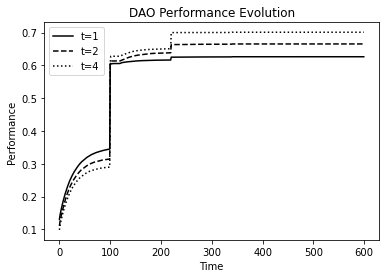

In [4]:
# Bottom-up Consensus Structure (rushed payoff function)
# In this version, individual payoff is not associated with the policy dependency
m = 24
s = 3
t_list = [1, 2, 4]
n = 100
alpha = 0.9
result_t_level = []
for t in t_list:
    result_repeat_level = []
    for _ in range(100):  # repeat
        payoff_list = []  # one round-> 5 * (100 + 20) = 600 points
        reality = Reality(m=m, s=s, t=t, alpha=alpha)
        superior = Superior(m=m, s=s, t=t, n=n, reality=reality)
        for _ in range(5):  # consensus evolution
            superior.policy = []  # remove the policy, for policy evolution
            for _ in range(100):  # independent search
                for individual in superior.individuals:
                    individual.free_local_search()
                performance = [individual.payoff for individual in superior.individuals]
                payoff_list.append(sum(performance) / len(performance))
            # form consensus
            for index in range(int(m/s)):
                for individual in superior.individuals:
                    individual.individual_policy = []  # reset the policy dummy
                    for i in range(m // s):
                        temp = sum(individual.belief[index] for index in range(i * s, (i + 1) *s))
                        if temp < 0:
                            individual.individual_policy.append(-1)
                        else:
                            individual.individual_policy.append(1)
                temp = sum([individual.individual_policy[index] for individual in superior.individuals])
                if temp > 0:
                    superior.policy.append(1)
                elif temp == 0:
                    superior.policy.append(0)
                else:
                    superior.policy.append(-1)
            # learn from the consensus
            for _ in range(20):
                for index, value in enumerate(superior.policy):
                    for individual in superior.individuals:
                        individual.constrained_local_search(focal_policy=value, focal_policy_index=index)
                performance = [individual.payoff for individual in superior.individuals]
                payoff_list.append(sum(performance) / len(performance))
        result_repeat_level.append(payoff_list)
    result_t_level.append(result_repeat_level)
results_across_t = []
for ti, t in enumerate(t_list):
    temp_within_t = []
    for index in range(600):
        temp = [result_repeat_level[index] for result_repeat_level in result_t_level[ti]]  # 100 repeat to take the average
        temp_within_t.append(sum(temp) / len(temp))
    results_across_t.append(temp_within_t)

x = range(600)
plt.plot(x, results_across_t[0], "k-", label="t=1")
plt.plot(x, results_across_t[1], "k--", label="t=2")
plt.plot(x, results_across_t[2], "k:", label="t=4")
# plt.savefig("search.jpg")
plt.title('DAO Performance Evolution')
plt.xlabel('Time')
plt.ylabel('Performance')
plt.legend()
plt.show()

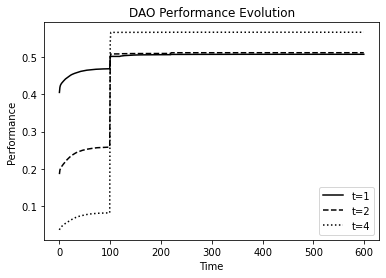

In [6]:
# Bottom-up Consensus Structure (rushed payoff function)
# In this version, individual payoff is not associated with the policy dependency
m = 24
s = 3
t_list = [1, 2, 4]
n = 100
alpha = 0.1
result_t_level = []
for t in t_list:
    result_repeat_level = []
    for _ in range(100):  # repeat
        payoff_list = []  # one round-> 5 * (100 + 20) = 600 points
        reality = Reality(m=m, s=s, t=t, alpha=alpha)
        superior = Superior(m=m, s=s, t=t, n=n, reality=reality)
        for _ in range(5):  # consensus evolution
            superior.policy = []  # remove the policy, for policy evolution
            for _ in range(100):  # independent search
                for individual in superior.individuals:
                    individual.free_local_search()
                performance = [individual.payoff for individual in superior.individuals]
                payoff_list.append(sum(performance) / len(performance))
            # form consensus
            for index in range(int(m/s)):
                for individual in superior.individuals:
                    individual.individual_policy = []  # reset the policy dummy
                    for i in range(m // s):
                        temp = sum(individual.belief[index] for index in range(i * s, (i + 1) *s))
                        if temp < 0:
                            individual.individual_policy.append(-1)
                        else:
                            individual.individual_policy.append(1)
                temp = sum([individual.individual_policy[index] for individual in superior.individuals])
                if temp > 0:
                    superior.policy.append(1)
                elif temp == 0:
                    superior.policy.append(0)
                else:
                    superior.policy.append(-1)
            # learn from the consensus
            for _ in range(20):
                for index, value in enumerate(superior.policy):
                    for individual in superior.individuals:
                        individual.constrained_local_search(focal_policy=value, focal_policy_index=index)
                performance = [individual.payoff for individual in superior.individuals]
                payoff_list.append(sum(performance) / len(performance))
        result_repeat_level.append(payoff_list)
    result_t_level.append(result_repeat_level)
results_across_t = []
for ti, t in enumerate(t_list):
    temp_within_t = []
    for index in range(600):
        temp = [result_repeat_level[index] for result_repeat_level in result_t_level[ti]]  # 100 repeat to take the average
        temp_within_t.append(sum(temp) / len(temp))
    results_across_t.append(temp_within_t)

x = range(600)
plt.plot(x, results_across_t[0], "k-", label="t=1")
plt.plot(x, results_across_t[1], "k--", label="t=2")
plt.plot(x, results_across_t[2], "k:", label="t=4")
# plt.savefig("search.jpg")
plt.title('DAO Performance Evolution')
plt.xlabel('Time')
plt.ylabel('Performance')
plt.legend()
plt.show()